<a href="https://colab.research.google.com/github/czhurdlespeed/TFDevCert/blob/main/TFCert_Practice/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TF

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Binary Classification
Let's try to visualize the data

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


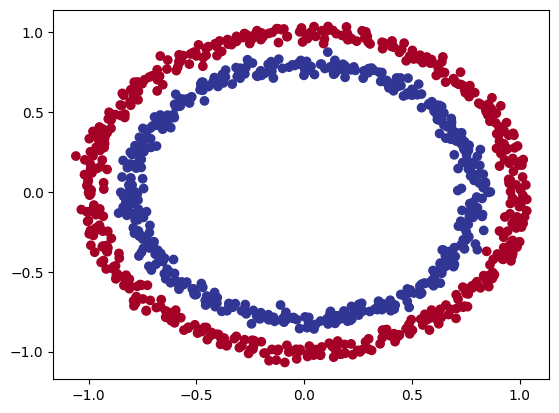

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c = y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
# first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

1. Create Model
2. Compile Model
3. Fit Model
4. Evaluate Model
5. Tweak
6. Evaluate...

In [9]:
# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 3.6880 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 1.1951 - accuracy: 0.4870
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7260 - accuracy: 0.4900
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 0.7039 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 12ms/step - loss: 0.6970 - accuracy: 0.4860


In [10]:
# Let's try to improve model

model_1.fit(X,y,epochs=200, verbose=0)

Let's add an extra layer

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics =["accuracy"])

model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.7222 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7181 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7096 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7075 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.4650
Epoch 11/

## Improving our model

1. Create a model - add more layers or hidden units
2. Compiling a model - choose different optimization function
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [12]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X,y,epochs=100, verbose = 0)

In [13]:
# Evaluate
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5120


[0.6974292397499084, 0.5120000243186951]

In [14]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
    Plots decision boundary created by a model predicting on X
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min,y_max,100))
  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap = plt.cm.RdYlBu, alpha =0.7)
  plt.scatter(X[:,0],X[:,1], c =y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
Binary


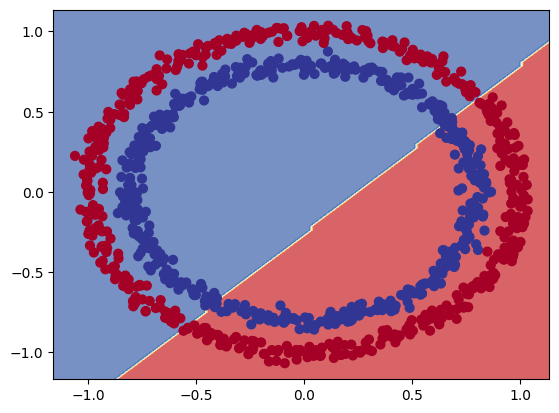

In [15]:
plot_decision_boundary(model_3, X, y)

In [16]:
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100, 1100,5) # y = X + 100

# Split regression data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 331.2924 - mae: 331.2924
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 213.7749 - mae: 213.7749
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 97.6262 - mae: 97.6262
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 55.8462 - mae: 55.8462
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 77.2115 - mae: 77.2115
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 56.7945 - mae: 56.7945
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 43.8881 - mae: 43.8881
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 46.3306 - mae: 46.3306
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 42.7174 - mae: 42.7174
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 43.2312 - mae: 43.2312
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 5ms/step


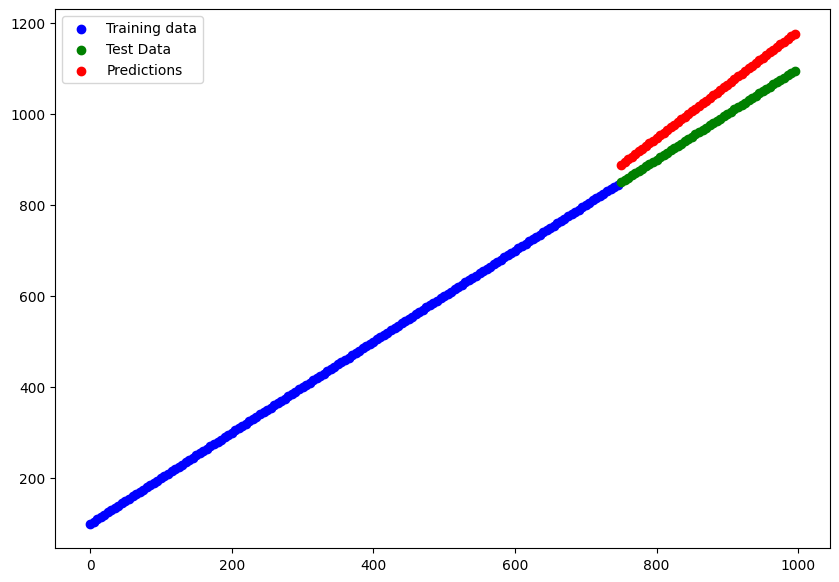

In [17]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label = "Test Data")
plt.scatter(X_reg_test,y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [18]:
# Let's build the same model from TF Playground
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation= tf.keras.activations.linear)
])

model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9496 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9250 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 5.9202 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9034 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8886 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8837 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8834 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8754 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8603 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8569 - accuracy: 0.4820
Epoch 11/

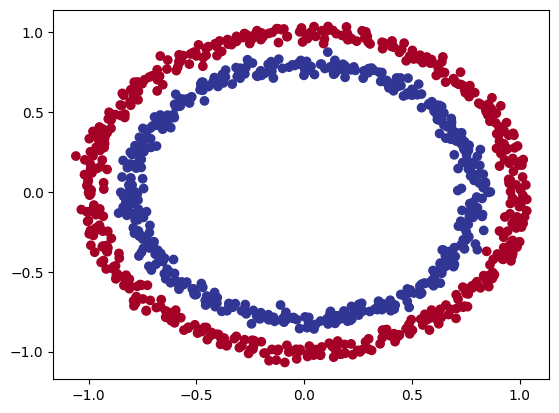

In [19]:
# Check out the data
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 4ms/step
Binary


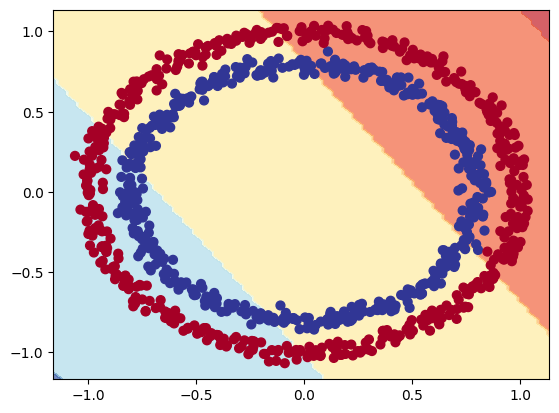

In [20]:
# Check the decision boundary
plot_decision_boundary(model = model_4, X = X, y = y)

In [21]:
# non-linear activation function
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)

])
model_5.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.4057 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3803 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3378 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3131 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2927 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2370 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1965 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1438 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0838 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0699 - accuracy: 0.4710
Epoch 11/

In [22]:
# increase number of neurons and layers
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(3, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])
history = model_6.fit(X,y,epochs=100, verbose = 0)

In [23]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2888 - accuracy: 0.9710


[0.28876614570617676, 0.9710000157356262]

313/313 [==============================] - 1s 3ms/step
Binary


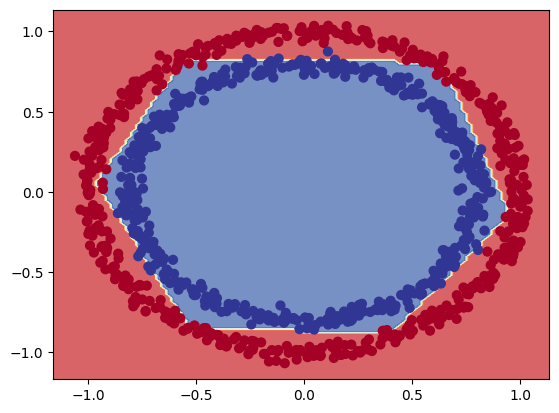

In [24]:
plot_decision_boundary(model_6, X, y)

🤨 Are we evaluating our model correctly? We didn't split the data into training and test sets!

In [25]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

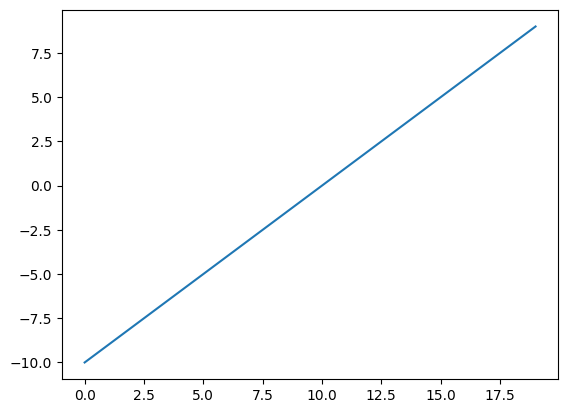

In [26]:
plt.plot(A)

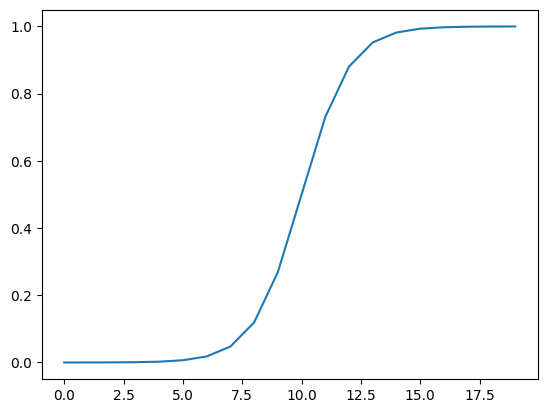

In [27]:
# sigmoid(x) = 1/ (1 + exp(-x))
# all output values between 0 and 1
B = tf.keras.activations.sigmoid(A)
plt.plot(B)

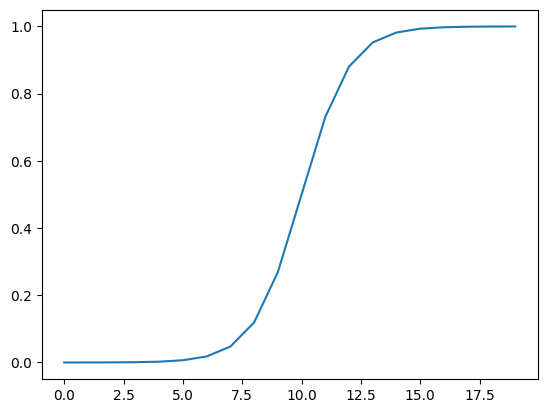

In [28]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
C = sigmoid(A)
plt.plot(C)

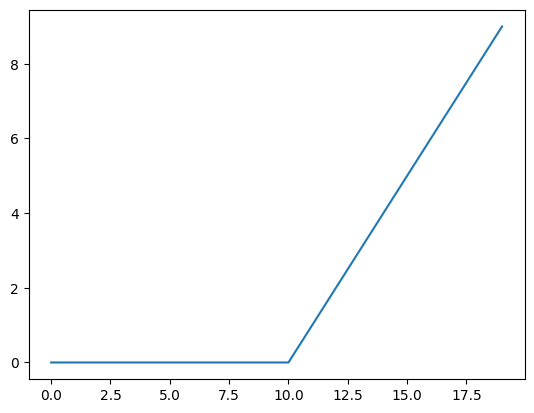

In [29]:
# relu is max(x, 0); turns all negative values to 0
def relu(x):
  return tf.maximum(x,0)

D = relu(A)
plt.plot(D)

In [30]:
# linear activation function: returns the input unmodified
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

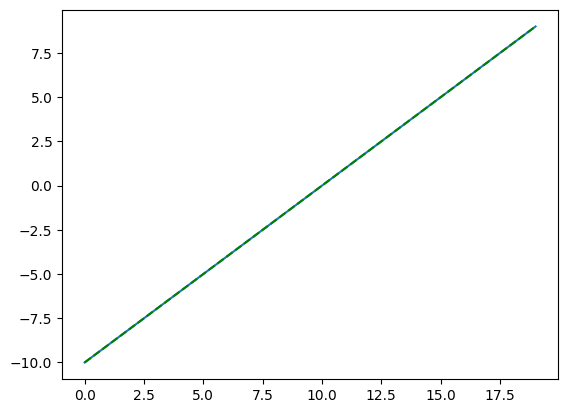

In [31]:
plt.plot(tf.keras.activations.linear(A))
plt.plot(A, "g--")

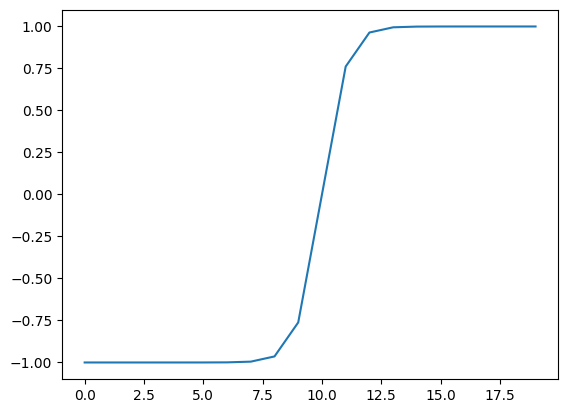

In [32]:
# tanh(x) = sinh(x) / cosh(x); output values betwee -1 and 1
plt.plot(tf.keras.activations.tanh(A))

## Evaluating and improving our classification

In [33]:
# Check how many examples we have
len(X)

1000

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [35]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [36]:
# Let's recreate a model to fit on training data and evaluate on test data
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_7.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])
history = model_7.fit(X_train, y_train, epochs=100, verbose = 0)

In [37]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0743 - accuracy: 0.9800


[0.07431114464998245, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
Binary
313/313 [==============================] - 1s 2ms/step
Binary


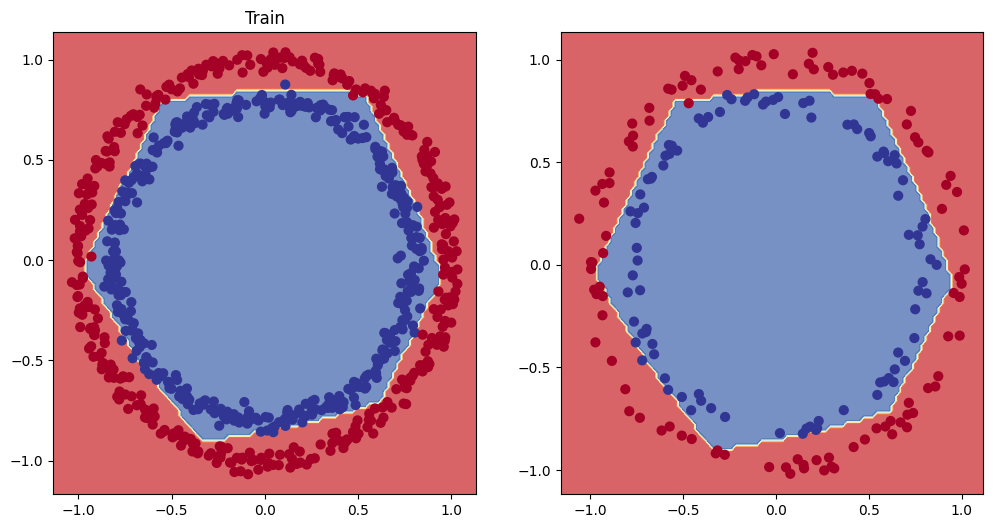

In [38]:
# plot decision boundaries for training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_7, X_test, y_test)
plt.show()

## Plot the loss (or training) curves

In [39]:
history.history

{'loss': [0.6991602182388306,
  0.6918559074401855,
  0.6895841956138611,
  0.6854447722434998,
  0.679483950138092,
  0.6711589097976685,
  0.6599982976913452,
  0.6472464799880981,
  0.6293002963066101,
  0.6050326824188232,
  0.5770159959793091,
  0.5366671085357666,
  0.5011529326438904,
  0.46586501598358154,
  0.4285263121128082,
  0.39632976055145264,
  0.36968690156936646,
  0.3638714551925659,
  0.33523422479629517,
  0.3171646296977997,
  0.30778658390045166,
  0.2931688129901886,
  0.27686697244644165,
  0.2635248303413391,
  0.24877117574214935,
  0.23042353987693787,
  0.2331121414899826,
  0.22891077399253845,
  0.22463524341583252,
  0.19881188869476318,
  0.18238604068756104,
  0.16231605410575867,
  0.149495467543602,
  0.1414121687412262,
  0.12584222853183746,
  0.11522660404443741,
  0.11177489906549454,
  0.1100664883852005,
  0.10738138109445572,
  0.1013103500008583,
  0.09620170295238495,
  0.08656885474920273,
  0.08814617246389389,
  0.08557264506816864,
  0.0

In [40]:
# convert history object into DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.699160,0.47875
1,0.691856,0.50000
2,0.689584,0.56000
3,0.685445,0.51375
4,0.679484,0.61125
...,...,...
95,0.054479,0.98375
96,0.050159,0.98750
97,0.075935,0.97625
98,0.051738,0.98125


Text(0.5, 1.0, 'Model 7 loss curves')

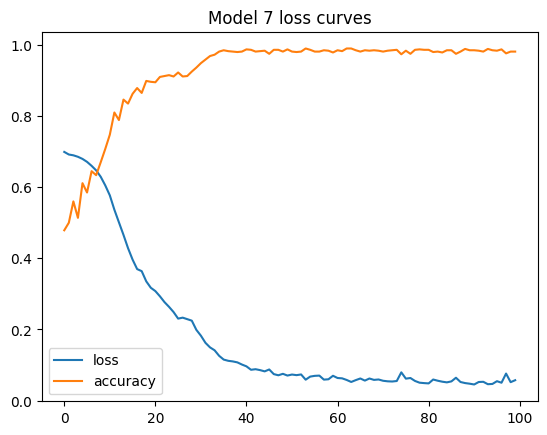

In [41]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 7 loss curves")

**Note:** For many problem, the loss function going down means the model is improving (the predictions it's making are getting closer to ground truth labels)

## Finding the best learning rate

* A learning rate **callback** - extra piece of functionality *while* it's training
* Another model
* A modified loss curves plot

In [42]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss= "binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_8 = model_8.fit(X_train,y_train, epochs = 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 6ms/step - loss: 0.6939 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.4913 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.4913 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6902 - accuracy: 0.4913 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6894 - accuracy: 0.4938 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

<Axes: xlabel='epochs'>

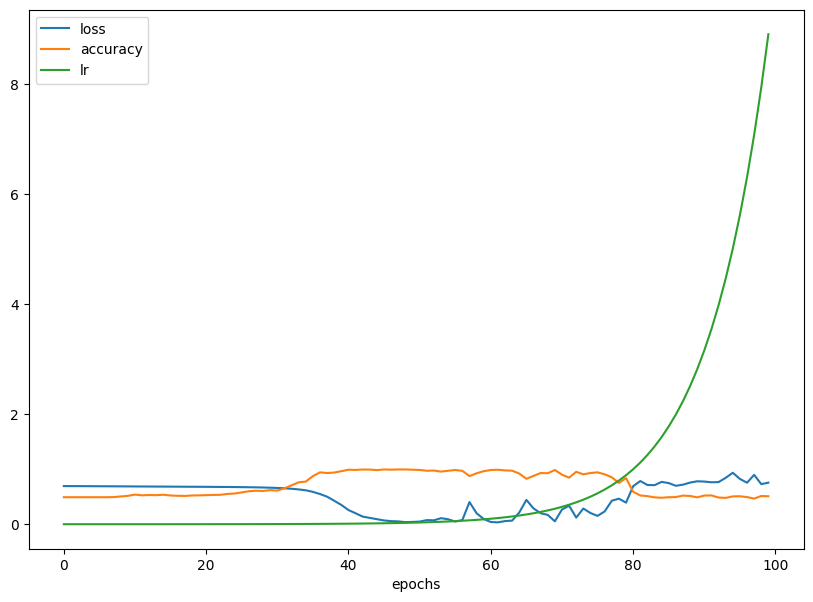

In [43]:
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

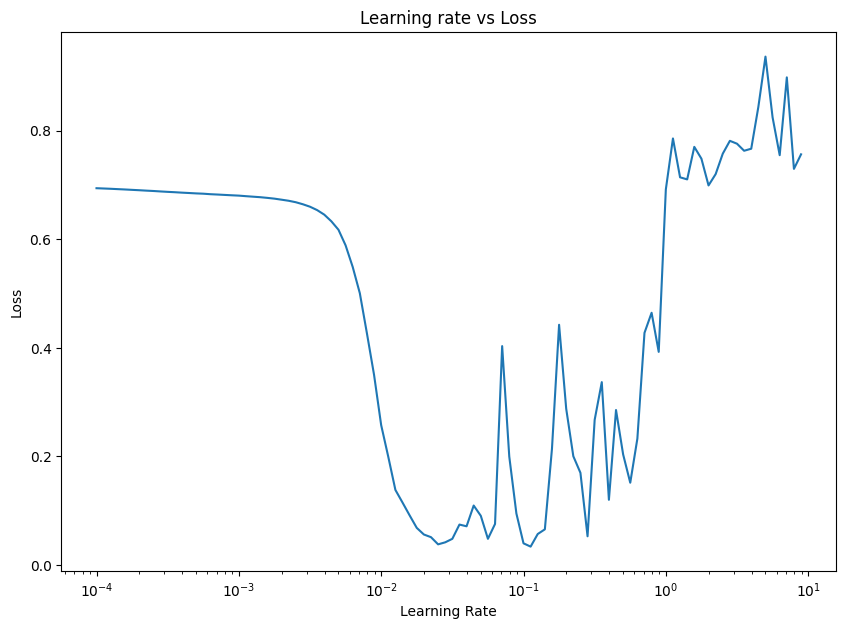

In [44]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [45]:
# Example of other typical learning rates:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [46]:
# Let's try using a higher learning rate
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation= "relu"),
    tf.keras.layers.Dense(4,activation= "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics = ["accuracy"])
history_9 = model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6959 - accuracy: 0.5675
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6212
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6288
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6274 - accuracy: 0.6800
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5821 - accuracy: 0.8025
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5085 - accuracy: 0.8375
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8913
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.9450
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.9725
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9762
Epoch 11/

In [47]:
# Evaluate model 9 on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0168 - accuracy: 0.9900


[0.01681351661682129, 0.9900000095367432]

In [48]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.0743 - accuracy: 0.9800


[0.07431114464998245, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
Binary
313/313 [==============================] - 1s 2ms/step
Binary


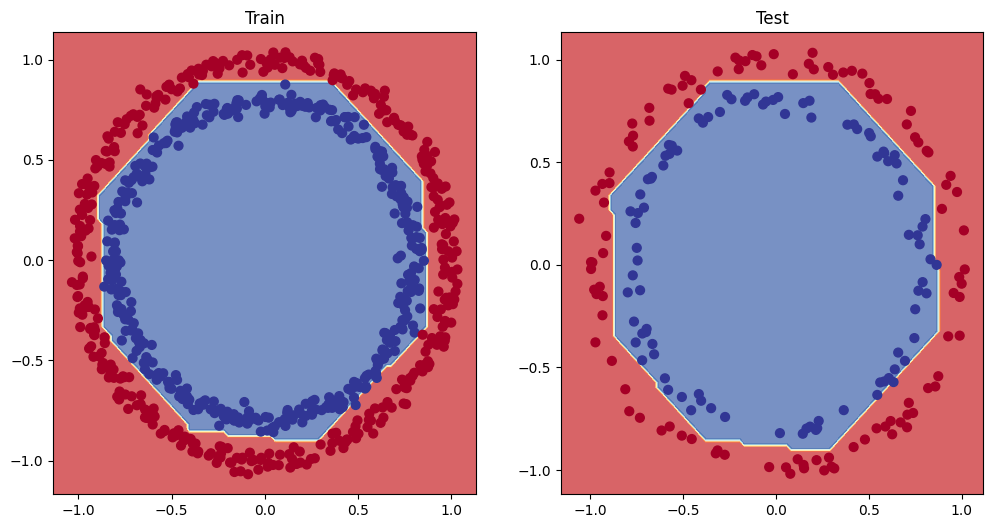

In [49]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X_test, y_test)
plt.show()

## More classification evaluation methods
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification Report [scikit-learn]

In [50]:
# Check the accuracy of our model
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss:.4f}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}")

7/7 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9900
Model loss on the test set: 0.0168
Model accuracy on the test set: 99.00


In [51]:
y_test[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [52]:
y_preds = model_9.predict(X_test)
y_preds[:10]

NameError: ignored

**Looks like our predictions array has come out in prediction probability form (sigmoid/softmax)**

In [53]:
# Convert prediction probabilites to binary format
tf.round(y_preds)[:10]

NameError: ignored

In [54]:
from sklearn.metrics import confusion_matrix

y_preds = model_9.predict(X_test)

confusion_matrix(y_test,tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[107,   0],
       [  2,  91]])

These are the results:
96 true negatives
103 true positives
0 false positives
1 false negatives

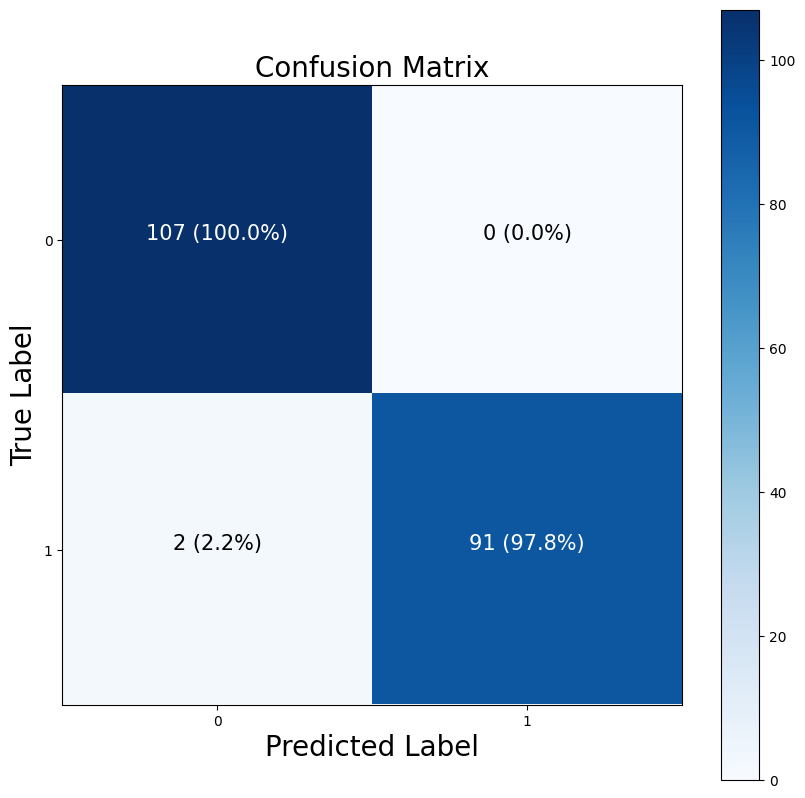

In [55]:
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test, tf.round(y_preds))

cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize = figsize)
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min())/2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i,j] > threshold else "black",
           size =15)

## Working with a larger example (multiclass classification)

More than two classes as an option (not binary)
[TF Datasets](https://www.tensorflow.org/datasets)

In [56]:
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test sets for us

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [57]:
# show first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [58]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

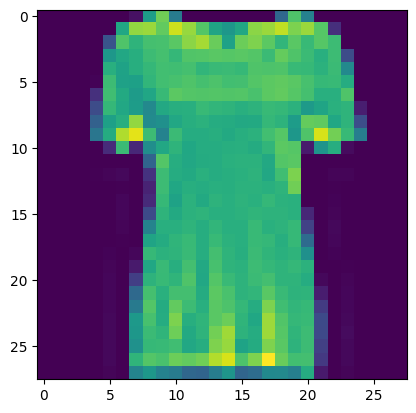

In [59]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[10])

In [60]:
train_labels[10]

0

In [61]:
# Create a small list so we can index onton our training labels so readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle Boot"]

Text(0.5, 1.0, 'Dress')

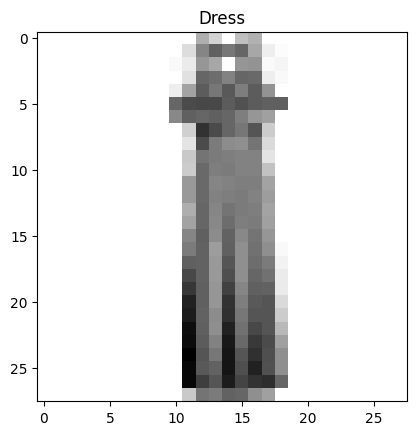

In [62]:
# Plot an example image and its label
index_of_choice = 250
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

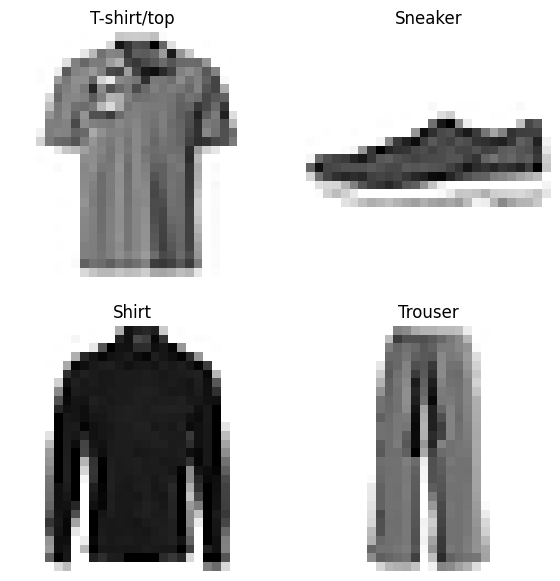

In [63]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


## Building a multi-class classification model

* Input shape = 28 x 28 (same of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If labels are one-hot encoded => use CategoricalCrossentropy()
  * If labels are not one-hot encoded => used SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)


In [64]:
tf.random.set_seed(42)
# data must be flattened from 28,28 to None, 784
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(len(set(train_labels)), activation = 'softmax')
])

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2669 - accuracy: 0.1258 - val_loss: 2.0538 - val_accuracy: 0.2204
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9968 - accuracy: 0.2009 - val_loss: 1.8012 - val_accuracy: 0.2426
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7575 - accuracy: 0.2422 - val_loss: 1.6949 - val_accuracy: 0.2594
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6666 - accuracy: 0.2850 - val_loss: 1.6117 - val_accuracy: 0.3483
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4734 - accuracy: 0.4014 - val_loss: 1.3899 - val_accuracy: 0.4411
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3319 - accuracy: 0.4413 - val_loss: 1.2985 - val_accuracy: 0.4556
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2933 - accuracy: 0.4469 - val_loss: 1.2709 - val_accuracy:

In [65]:
len(set(train_labels))

10

In [66]:
# Check the model summary
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# Check the min max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be normalized
* Divide by the maximum

In [68]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [69]:
# Data normalized
tf.random.set_seed(42)
# data must be flattened from 28,28 to None, 784
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(len(set(train_labels)), activation = 'softmax')
])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4566 - accuracy: 0.4867 - val_loss: 1.1795 - val_accuracy: 0.6127
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0827 - accuracy: 0.6209 - val_loss: 1.0290 - val_accuracy: 0.6267
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9841 - accuracy: 0.6425 - val_loss: 0.9841 - val_accuracy: 0.6591
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9292 - accuracy: 0.6628 - val_loss: 0.9129 - val_accuracy: 0.6748
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8862 - accuracy: 0.6787 - val_loss: 0.8748 - val_accuracy: 0.6894
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8416 - accuracy: 0.6974 - val_loss: 0.8455 - val_accuracy: 0.6961
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7803 - accuracy: 0.7208 - val_loss: 0.7694 - val_accuracy:

🔑 **Note:** Neural networks tend to prefer data in numerical form that is normalized ([0,1])

<Axes: title={'center': 'Normalized data'}>

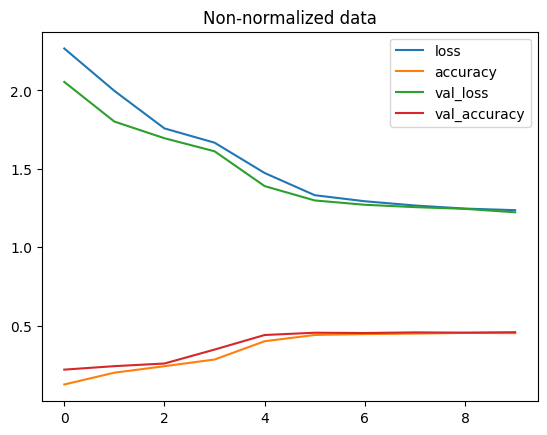

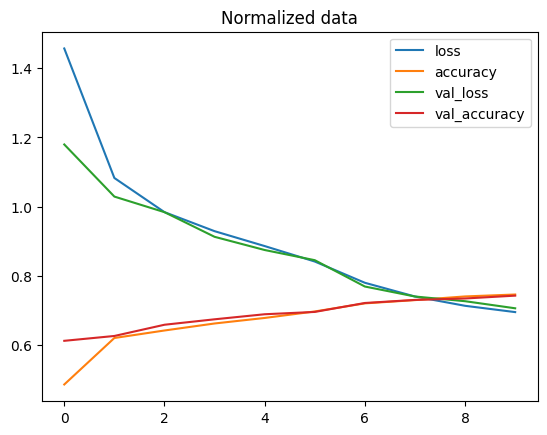

In [70]:
import pandas as pd
# plot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title= "Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So compare same architecture and different data or different architecture and same data

In [72]:
# Set random seed
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs = 40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2581 - accuracy: 0.5429 - val_loss: 0.8256 - val_accuracy: 0.7016 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7530 - accuracy: 0.7243 - val_loss: 0.7466 - val_accuracy: 0.7216 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6861 - accuracy: 0.7538 - val_loss: 0.6838 - val_accuracy: 0.7553 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6491 - accuracy: 0.7678 - val_loss: 0.6536 - val_accuracy: 0.7656 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6306 - accuracy: 0.7745 - val_loss: 0.6474 - val_accuracy: 0.7654 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6171 - accuracy: 0.7756 - val_loss: 0.6946 - val_accuracy: 0.7551 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

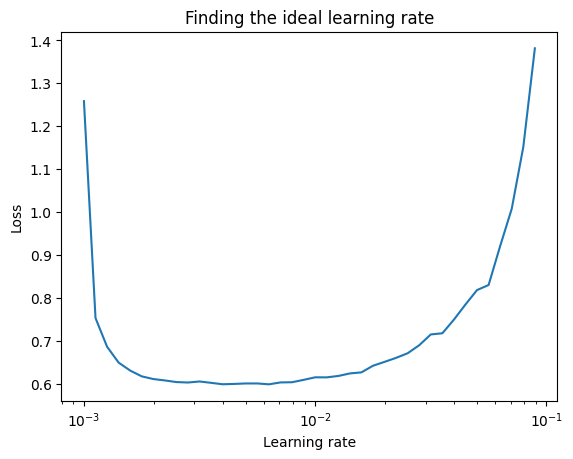

In [73]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [74]:
10**-3

0.001

In [75]:
# refit model with ideal learning rate
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics = ["accuracy"])

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs = 20,
                          validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3050 - accuracy: 0.4926 - val_loss: 0.9979 - val_accuracy: 0.6085
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9195 - accuracy: 0.6382 - val_loss: 0.8633 - val_accuracy: 0.6727
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7529 - accuracy: 0.7119 - val_loss: 0.7169 - val_accuracy: 0.7282
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6764 - accuracy: 0.7376 - val_loss: 0.6869 - val_accuracy: 0.7317
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6457 - accuracy: 0.7461 - val_loss: 0.6628 - val_accuracy: 0.7413
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6246 - accuracy: 0.7510 - val_loss: 0.6501 - val_accuracy: 0.7427
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6127 - accuracy: 0.7553 - val_loss: 0.6353 - val_accuracy:

## Evaluating our multi-class classification model

* Evalutate performance using other classification metrics e.g. confusion matrix
* Asses its predictions through visualizations
* Improve its results e.g. train longer or change architecture
* Save and export it for use in an application

In [76]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):
  cm = confusion_matrix(y_true, y_preds)

  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min())/2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i,j] > threshold else "black",
            size = text_size)

In [77]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [79]:
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilites

y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[6.45612119e-10, 5.23229437e-26, 7.94522848e-09, 2.08130360e-10,
        1.38594925e-11, 2.47364476e-01, 2.15410571e-11, 8.77908692e-02,
        3.53262767e-05, 6.64809346e-01],
       [4.47258027e-03, 7.04182021e-05, 5.29386401e-01, 5.76548278e-03,
        3.84832531e-01, 1.58458948e-03, 7.28888214e-02, 5.96733065e-04,
        2.97887338e-04, 1.04625855e-04],
       [1.14958535e-03, 9.97562945e-01, 8.64857874e-09, 1.28344377e-03,
        3.57558774e-11, 8.82335376e-26, 3.90257401e-06, 5.65276346e-38,
        1.27995561e-08, 1.00969238e-21],
       [9.69234621e-04, 9.91507173e-01, 1.66897030e-09, 7.52154598e-03,
        5.74778350e-11, 3.91475602e-25, 1.91593904e-06, 0.00000000e+00,
        7.44165902e-08, 2.15819722e-21],
       [1.60158768e-01, 3.20164161e-03, 4.85884994e-01, 2.61254366e-02,
        1.12765431e-02, 7.63641026e-08, 3.12771052e-01, 7.09413639e-10,
        5.81254193e-04, 1.66929965e-07]], dtype=float32)

In [81]:
y_preds = tf.round(y_probs)
y_preds[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [82]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [85]:
y_preds = y_probs.argmax(axis=1)

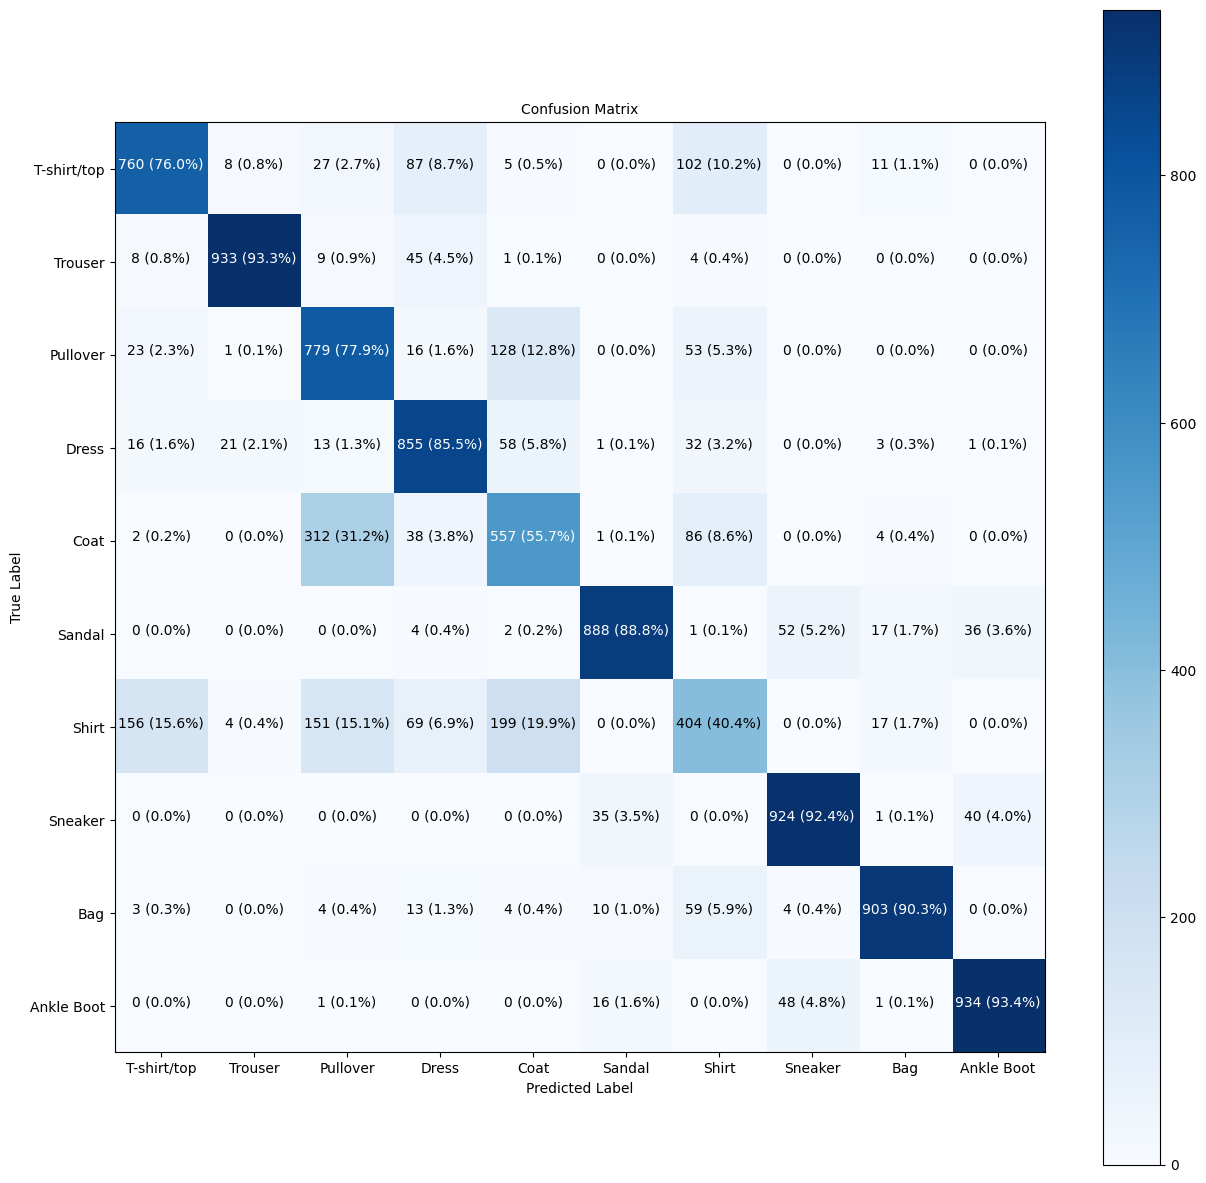

In [92]:
plot_confusion_matrix(test_labels, y_preds, classes = class_names, figsize = (15,15), text_size = 10)

> **Note:** with images and other visual data, visualize as much as possible. Both inputs and outputs

In [112]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
    Picks random image, plots it, and labels it with a prediction and truth label
  """
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28), verbose =0)
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  plt.imshow(target_image, cmap = plt.cm.binary)

  # change color of titles depending on prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label),
             color = color)

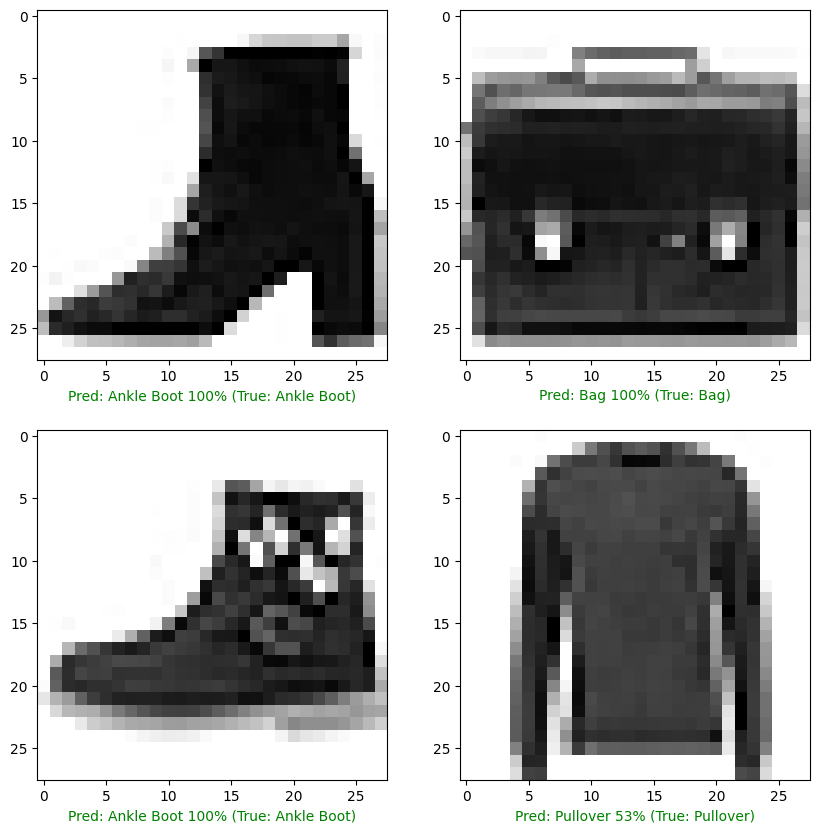

In [113]:
# check out image and its prediction
#plot_random_image(model_14, images = test_data_norm, true_labels = test_labels, classes = class_names)
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  plot_random_image(model_14, images = test_data_norm, true_labels = test_labels, classes = class_names)

## What patterns is our model learning?

In [114]:
# Find the layers of our most recent model
model_14.layers

In [115]:
# Extract a layer
model_14.layers[1]

In [118]:
# Get patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape


(array([[ 0.01557424, -0.4177822 ,  0.47853333, -0.09870959],
        [ 0.6592865 , -0.41255474,  1.085572  ,  0.81055063],
        [ 0.7495039 , -0.822366  ,  0.4862824 , -0.08316627],
        ...,
        [-0.19646537,  0.00409858,  0.99563134,  0.23815274],
        [ 0.22882235,  0.0795773 ,  1.0291809 ,  0.05121826],
        [-0.3048698 , -0.24688374,  0.12763657,  0.8510221 ]],
       dtype=float32),
 (784, 4))

In [122]:
weights, biases = model_14.layers[2].get_weights()

weights, weights.shape

(array([[-1.8200121 ,  1.7906691 , -0.78015226,  0.59248686],
        [-0.04773975,  0.44647807,  0.21198983,  1.7220409 ],
        [ 0.4535007 ,  1.6448354 ,  0.80442625, -1.1494018 ],
        [ 1.4113234 , -0.9201983 ,  0.02662097,  0.55291384]],
       dtype=float32),
 (4, 4))

In [123]:
weights, biases = model_14.layers[3].get_weights()

weights, weights.shape

(array([[ 0.7139232 ,  0.9947047 , -0.02887967,  0.25390983, -1.0274808 ,
         -2.7843113 ,  0.15608762, -3.7587793 , -0.18746187, -1.6099803 ],
        [-0.48199326, -1.5377544 , -0.32469124, -0.52358323, -0.7420962 ,
          0.23751107, -0.72030926,  0.32391435, -0.17243928,  0.6877882 ],
        [-1.1998894 ,  0.02639387, -1.964613  ,  0.36456424,  0.4531699 ,
          0.87017035, -0.97491413, -1.2126609 ,  0.17077407, -0.7679038 ],
        [ 0.33429664, -0.55986756, -0.38232288, -0.11444379, -0.28423336,
         -0.07478067,  0.31102338,  0.12452545,  0.68729055, -0.8218898 ]],
       dtype=float32),
 (4, 10))

> *For the dense layer, the 4 nodes each have a weight matrix that is adjusted/updated during training to make predictions. Since each pixel is attached to each node, each pixel has 4 weights + 4 biases that are adjusted to learn the "best" value for the given pixel so that predictions can be made for the entire image*

In [119]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Check out the biases vector

In [120]:
biases, biases.shape

(array([0.6252324, 2.6621792, 1.9572039, 2.3451414], dtype=float32), (4,))

> *Each node has it's own bias; therefore, a dense layer with 4 nodes will have 4 biases*

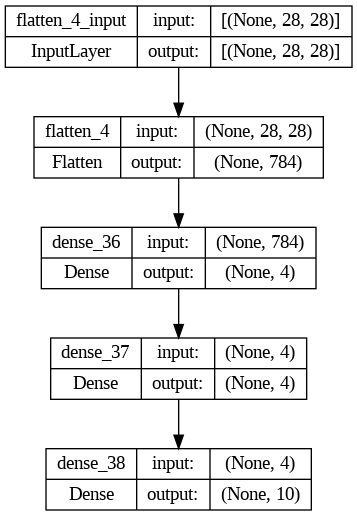

In [125]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes = True)